In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle 

In [12]:
df_prot = pd.read_csv('../data/data_no_dups.csv')
df_seq = pd.read_csv('../data/data_seq.csv')

In [13]:
print('Le dataset proteine a {} lignes et {} columns'.format(df_prot.shape[0], df_prot.shape[1]))
print('Le dataset sequences a {} lignes et {} columns'.format(df_seq.shape[0], df_seq.shape[1]))

Le dataset proteine a 141401 lignes et 14 columns
Le dataset sequences a 467304 lignes et 5 columns


####  Fusion des fichiers 

In [14]:
# Data merging 

df = pd.merge(df_prot, df_seq, on =['structureId','macromoleculeType', 'residueCount' ],   how = 'inner')


In [15]:
print(f'\033[1m\nNombre de lignes du dataset après fusion: \033[0m\t\t {df.shape[0]:,}'
      f'\033[1m\nNumbre de colonnes du dataset après fusion:\033[0m \t  {df.shape[1]:}')
     


Nombre de lignes du dataset après fusion: 		 471,149
Numbre de colonnes du dataset après fusion: 	  16


#### Data info 

In [16]:
df.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471149 entries, 0 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471149 non-null  object 
 1   classification            471145 non-null  object 
 2   experimentalTechnique     471149 non-null  object 
 3   macromoleculeType         435379 non-null  object 
 4   residueCount              471149 non-null  int64  
 5   resolution                449486 non-null  float64
 6   structureMolecularWeight  471149 non-null  float64
 7   crystallizationMethod     314754 non-null  object 
 8   crystallizationTempK      317697 non-null  float64
 9   densityMatthews           389645 non-null  float64
 10  densityPercentSol         389768 non-null  float64
 11  pdbxDetails               385468 non-null  object 
 12  phValue                   340694 non-null  float64
 13  publicationYear           413513 non-null  f

#### Recherche des données manquantes 

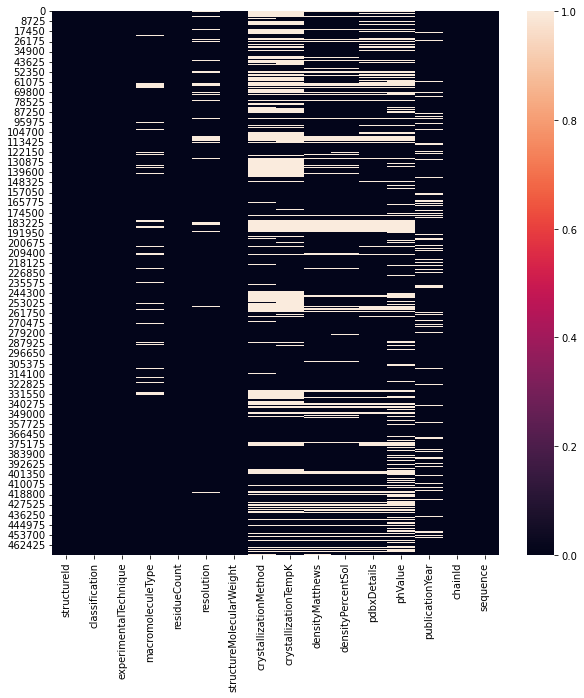

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull());

In [18]:
# % Missing values per column

df_nan = pd.DataFrame(round((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100,1)).reset_index()
dtype = df.dtypes
df_nan.columns = ['Columns', '% of misising values']
df_nan

,Columns,% of misising values
0,crystallizationMethod,33.2
1,crystallizationTempK,32.6
2,phValue,27.7
3,pdbxDetails,18.2
4,densityMatthews,17.3
5,densityPercentSol,17.3
6,publicationYear,12.2
7,macromoleculeType,7.6
8,resolution,4.6
9,sequence,0.0


In [19]:
# Saving data 

with open('../data/basic.pkl', 'wb') as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(df)
    